# Partie 1
## Questions
*1. Justifier pourquoi l’algorithme de la puissance itérée (vu en détails dans le TD de R2.09
dédiée à la SAE) permet de calculer le score de chacune des pages.*

L'algorithme de la puissance itérée permet de calculer le score de chacune des pages car cette fonction permet de calculer un vecteur propre de la matrice, et ce vecteur propre est utilisé afin de trouver le score de chaque page.

*2. Implémenter cet algorithme pour calculer le score de chacune des pages du graphe
précédent. On vérifiera (numériquement) que le vecteur de score obtenu est bien ap-
proximativement solution de r = Qr.*

Voici une implémentation Python de la fonction de puissance itérée:
La fonction prend en entrée une Matrice `M` et un seuil d'approximation `e` et retourne un vecteur propre `newX` pour cette matrice, une valeur propre `np.linalg.norm(np.dot(M, X))` et le nombre d'itérations effectués `n`.

In [1]:
import numpy as np

def puissance_iteree(M, e):
    X = np.array([np.random.randint(1, 10) for _ in range(len(M))])
    newX = X
    n = 1
    while 1:
        newX = (np.dot(M, X)) / np.linalg.norm(np.dot(M, X))
        if np.linalg.norm(newX - X) <= e: break
        X = newX
        n += 1
    return newX, np.linalg.norm(np.dot(M, X)), n

def calculQ(M):
    N = np.sum(M, axis=0)
    q = np.empty((M[0].size, M[0].size))
    for i in range(M[0].size):
        for j in range(M[0].size):
            if N[j] == 0:
                q[i][j] = 0
            else:
                q[i][j] = M[i][j] / N[j]
    return q
    
            

In [2]:
N = 14

# i = horizontal # j = vertical

matriceCPartie1 = np.array([
    #1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14
    [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], # 1
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 2
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 3
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 4
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 5
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # 6
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # 7
    [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # 8
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # 9
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1], # 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], # 12
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # 13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0], # 14
    ])

vecteurPropre, valeurPropre, iterations = puissance_iteree(matriceCPartie1, 10**(-6))

for index, elem in enumerate(vecteurPropre):
    print(f"Score Page {index+1}: {elem}")

Score Page 1: 0.39345957528584286
Score Page 2: 0.14986941655595182
Score Page 3: 0.20695492605723428
Score Page 4: 0.22869888961485027
Score Page 5: 0.29406670953992825
Score Page 6: 0.40267256064134593
Score Page 7: 0.1533788253942863
Score Page 8: 0.2702234598628582
Score Page 9: 0.1533788253942863
Score Page 10: 0.39347195789963363
Score Page 11: 0.14987445979229913
Score Page 12: 0.20696202332137284
Score Page 13: 0.22870682345095908
Score Page 14: 0.2940770381259278


Afin de vérifier que le calcul est correct, on vérifie `r = Qr`
Pour que cette formule sois vrai, il faut que Q soit 1.
On calcul donc la valeur propre de Q:

In [3]:
print(f"Valeur propre de Q pour matrice: {puissance_iteree(calculQ(matriceCPartie1), 10**(-8))[1]}")

Valeur propre de Q pour matrice: 0.999999999999999


On remarque que la valeur propre de Q est bien égal à 1, donc, `r = Qr`.

*3. Analyser la pertinence du résultat obtenu.*

Le résultat signifie que la page qui sera tout en haut du moteur de recherche sera la page 6, puisqu'elle a le score le plus important. En revanche, les pages 2 et 11 seront les plus basses, puisqu'elles sont les moins importantes.

# Partie 2

In [4]:
N = 5

matriceCPartie2 = np.array([
    [0, 1, 1, 1, 1],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    ])

#vecteurPropre, valeurPropre, iterations = puissance_iteree(matriceCPartie2, 10**(-6))
    
#for index, elem in enumerate(vecteurPropre):
#    print(f"Score Page {index+1}: {elem}")

On se rend compte que pour les pages ne se faisant *pointé par aucune autre page*, l'algorithme tente de *diviser par 0*. Pour régler cela, on instaure une **matrice de transition** avec un **facteur d'amortissement**.

In [5]:
def calculP(M, N, a):
    P = np.empty((N, N))
    Nj = np.sum(M, axis=0)
    Q = calculQ(M)
    for i in range(N):
        for j in range(N):
            if Nj[j] == 0:
                P[i][j] = 1/N
            else:
                P[i][j] = a * Q[i][j] + (1 - a) / N
    return P

vecteurPropre, valeurPropre, iterations = puissance_iteree(calculP(matriceCPartie2, N, 0.85), 10**(-6))

for index, elem in enumerate(vecteurPropre):
    print(f"Score Page {index+1}: {elem}")

Score Page 1: 0.8258225137197732
Score Page 2: 0.40102178108875836
Score Page 3: 0.19748691424161416
Score Page 4: 0.2814188059327334
Score Page 5: 0.19748691424161416


On remarque que maintenant les scores sont bien calculé sans erreurs, et que la page 1, qu'on peut facilement déduire aura le plus haut score, puisque pointé par beaucoups de pages, a bien le plus haut score dans nos résultats. On vérifie maintenant que `r = Pr`, ou que `P` soit égal à 1.

In [6]:
print(f"Valeur propre de P pour matrice: {puissance_iteree(calculP(matriceCPartie1, N, 0.85), 10**(-8))[1]}")

Valeur propre de P pour matrice: 0.9337866275010555


On remarque que P est approximativement égal à 1, donc `r = Pr`.

# Partie 3

*1. Analyser l’influence du critère d’arrêt dans l’algorithme de la puissance itérée.*

Plus le seuil de précision augmente, plus on devrait avoir un résultat précis et plus on devrait avoir d'itérations. On vérifie cela grâce à une représentation graphique avec différent seuils de précisions. On regardera non seulement le nombre d'itérations, mais aussi la précision du résultat. On fera donc cela avec Q, puisque l'on sait que Q devrait valoir 1.

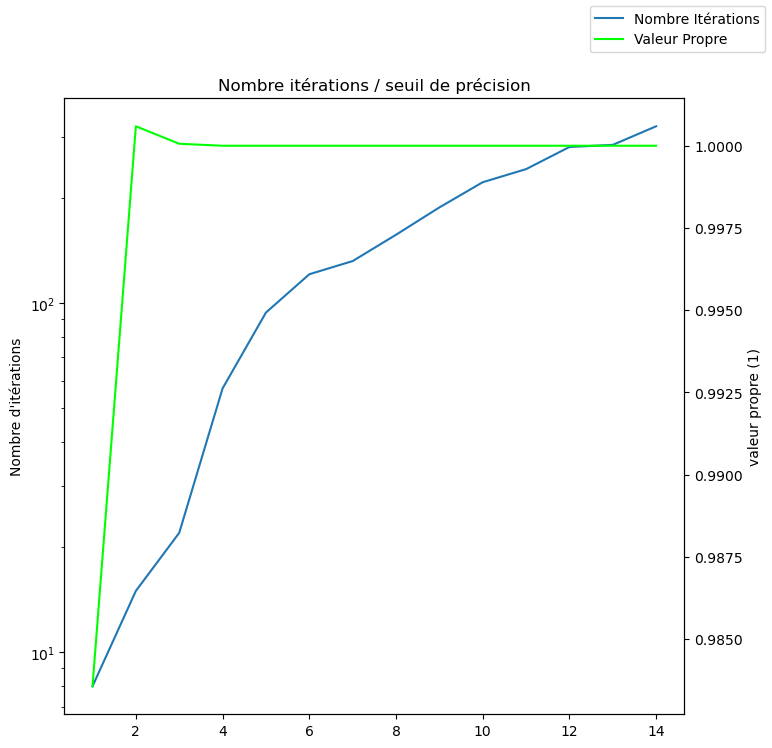

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

l = []
v = []
Q = calculQ(matriceCPartie1)
for x in range(1, 15):
    e = 10**(-x)
    puit = puissance_iteree(Q, e)
    l.append(puit[2])
    v.append(puit[1])
ax1.semilogy(range(1, 15), l)
plt.title("Nombre itérations / seuil de précision")
ax1.set_ylabel("Nombre d'itérations")
ax2.plot(range(1, 15), v, color="#00FF00")
ax2.set_ylabel("valeur propre (1)")
fig.legend(["Nombre Itérations", "Valeur Propre"])

plt.show()

Sur ce graphe, on remarque bien que le nombre d'itérations augmente, et que la valeur propre s'approche de 1, ce qui est le bon résultat. On remarque aussi que tout seuil de précision au delà de 10e-3 n'est pas nécessaire puisque dès 10e-3, la valeur propre vaut 1.

*2. Ajouter quelques hubs (pages qui ont beaucoup de liens sortant) et autorités (pages qui ont beaucoup de liens entrant). Commenter l’impact sur les scores.*

On a donc créé une nouvelle matrice à partir de la matrice de la *Partie 1*:
* 15: Autorité
* 16: Hub
* 17: Hub (aucun lien entrant)
* 18: Égal
* 19: Autorité (aucun lien sortant)
* 20: Autorité
Voici la nouvelle matrice:

In [8]:
N = 20

matriceCPartie3 = np.array([
    #1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20
    [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 1
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # 2
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], # 3
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], # 4
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 5
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], # 6
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], # 7
    [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 8
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # 9
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1], # 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], # 12
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1], # 13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0], # 14
    [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], # 15
    [0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], # 16
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 17
    [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 18
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], # 19
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], # 20
    ])

vecteurPropre, valeurPropre, iterations = puissance_iteree(calculP(matriceCPartie3, N, 0.85), 10**(-6))

for index, elem in enumerate(vecteurPropre):
    if index == 14:
        break
    print(f"Score Page {index+1}: {elem}")
print(f"Score Page 18: {vecteurPropre[17]}")

print("Autorités:")
sum = 0
for index in [14, 18, 19]:
    print(f"Score Page {index+1}: {vecteurPropre[index]}")
    sum += vecteurPropre[index]
print(f"Moyenne des autorités: {sum / 3}")

print("Hubs:")
sum = 0
for index in [15, 16]:
    print(f"Score Page {index+1}: {vecteurPropre[index]}")
    sum += vecteurPropre[index]
print(f"Moyenne des Hubs: {sum / 2}")

Score Page 1: 0.17046785641171244
Score Page 2: 0.09057665531841046
Score Page 3: 0.1672007556640455
Score Page 4: 0.16677323091059404
Score Page 5: 0.1039085657109216
Score Page 6: 0.12660776258617346
Score Page 7: 0.06480914490088151
Score Page 8: 0.08707506863828615
Score Page 9: 0.0818008456667177
Score Page 10: 0.4061106100319593
Score Page 11: 0.077820392708974
Score Page 12: 0.1571967203457511
Score Page 13: 0.3028441016592362
Score Page 14: 0.20009961950645397
Score Page 18: 0.13603533969358506
Autorités:
Score Page 15: 0.3752493755994275
Score Page 19: 0.13017291169246462
Score Page 20: 0.555383477506621
Moyenne des autorités: 0.3536019215995044
Hubs:
Score Page 16: 0.2182463093362602
Score Page 17: 0.04330102431570747
Moyenne des Hubs: 0.13077366682598385


On remarque que, en moyenne, les autorités ont un score plus élevé que les Hubs. C'est explicable par le fait qu'une page gagne en score lorsqu'elle *se fait pointé* par une autre page, alors qu'elle n'en gagne pas lorsqu'elle même *pointe* vers une autre page.

*3. Essayez d’accroître le score de certaines pages. Expliquez votre méthode et validez-la expérimentalement.*

Pour augmenter le score d'une page, on pense qu'il faut:
* Réduire le nombre de liens sortant de la page.
* Augmenter le nombre de liens entrant dans la page.
* Augmenter le score des pages pointant vers la page.
* Réduire le nombre de liens sortant des pages pointant vers la page.

Ceci peut être fait de manière récursive afin d'augmenter le plus possible le score d'une certaine page.

Voici une nouvelle matrice dans laquelle nous avons suivis ces étapes afin d'augmenter le score de la page 17

In [9]:
matriceCPartie3S17 = np.array([                    # \/ On enlève des 1 ici (réduction de liens sortants)
    #1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20
    [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 1
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # 2
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], # 3
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], # 4
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 5
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 6
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 7
    [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 8
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # 9
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1], # 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], # 12
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1], # 13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0], # 14
    [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], # 15
    [0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], # 16
    [1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1], # 17 <-- On rajoute des 1 ici (augmentation de liens entrants)
    [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 18
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], # 19
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], # 20
    ])

oldVal = vecteurPropre[16]

vecteurPropre, valeurPropre, iterations = puissance_iteree(calculP(matriceCPartie3S17, N, 0.85), 10**(-6))
print(f"Ancien score de la page 17: {oldVal}")
print(f"Nouveau score de la page 17: {vecteurPropre[16]}")
print(f"Une différence de +{vecteurPropre[16] - oldVal}")

Ancien score de la page 17: 0.04330102431570747
Nouveau score de la page 17: 0.3726964390663093
Une différence de +0.3293954147506018


La page 17 ayant gagné du score, la méthode fonctionne bien.